In [1]:
%cd ..

d:\work\ADASVehicleTracking


In [2]:
from GMM.coarse_clustering import run_GMM_clustering
from utils import props, show_image, get_cluster_images_separated

In [3]:
filename = 'D:\work\ADASVehicleTracking\Data\DSC_1643.jpg'

In [4]:
gmm_image = run_GMM_clustering(image_path = filename, k = 3)

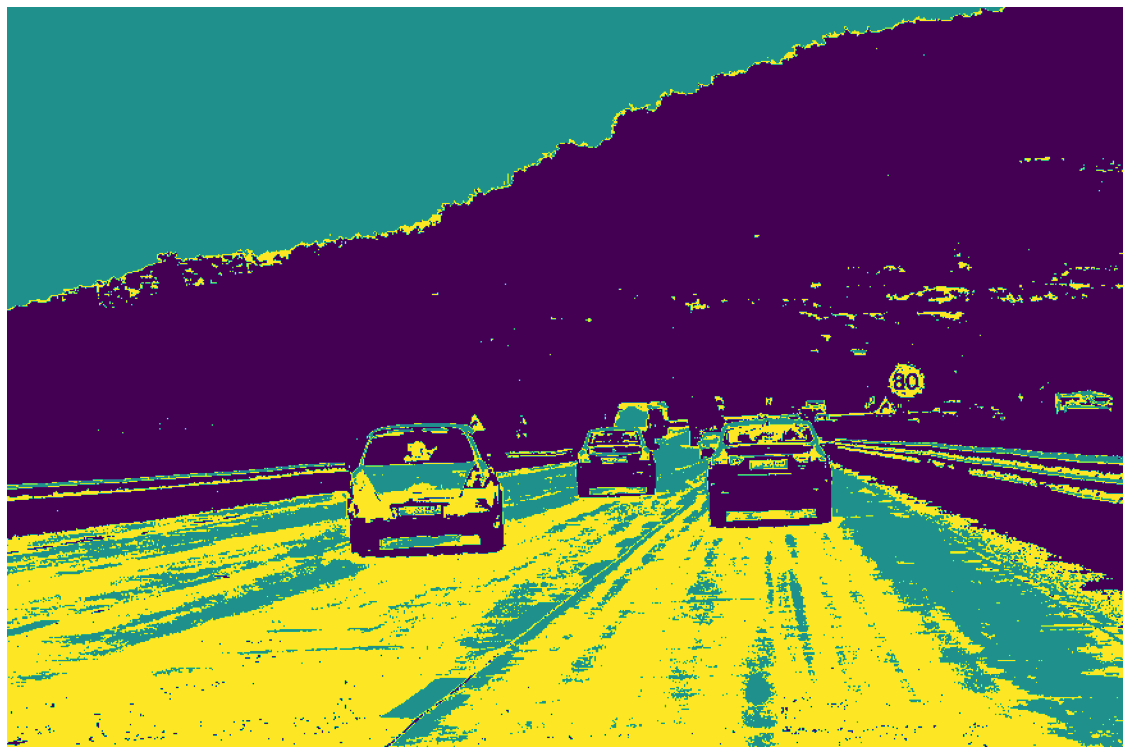

In [5]:
show_image(gmm_image, title = "GMM_image")

In [6]:
props(gmm_image, show_uniques=True)

Shape : (578, 872, 1) Maximum : 2 Minimum : 0 Data Type : uint8
Uniques : [0 1 2]


In [7]:
all_GMM_clustered_images = get_cluster_images_separated(gmm_image, save = True, prepend_save = "GMM_cluster_");

In [8]:
from CCL.fine_clustering import run_CCL_clustering

In [9]:
len(all_GMM_clustered_images)

3

In [10]:
all_CCL_clustered_images = list(map(lambda x: run_CCL_clustering(img_data = x, convert_BGR2RGB=True), all_GMM_clustered_images))

Shape : (578, 872, 1) Maximum : 1 Minimum : 0 Data Type : int32


error: OpenCV(4.5.5) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<1,-1,-1>,struct cv::impl::A0xa96199bf::Set<3,4,-1>,struct cv::impl::A0xa96199bf::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 4 (CV_32S)
